Пришло время первого небольшого проекта по статистике! На этот раз исследуем набор данных о видеоиграх, объем продаж которых составил более 100 000 копий.

Задания 
Первый шаг – загрузить данные и убедиться, что всё считалось правильно: посмотреть на столбцы, размер, наличие пропущенных значений (если есть – удалить). Также изучите типы переменных.

Постройте график распределения количества выпущенных игр по годам и выведите описательные характеристики переменной Year.
На каких платформах произошло больше всего релизов?

Игры каких издателей (Publisher) встречаются в датасете чаще всего?

В каком регионе медианное значение объема продаж игр Nintendo является наибольшим? (Регионы: NA, EU, JP, Other)

Изучите объемы продаж игр Nintendo в Японии с разбивкой жанрам. Посмотрите на медиану, среднее, межквартильный размах.

Визуализируйте динамику изменения объема мировых продаж (Global_Sales) по годам для игр Nintendo следующих жанров: Fighting, Simulation, Platform, Racing, Sports. В какие моменты времени было продано больше всего игр жанра Sports?

Описание данных
Имеются следующие поля:

Rank – место по объему продаж

Name – название игры

Platform – платформа, на которой выпущена игра

Year – год релиза

Genre – жанр

Publisher – издатель

NA_Sales – продажи в Северной Америке, в млн.

EU_Sales – продажи в Европе, в млн.

JP_Sales – продажи в Японии, в млн.

Other_Sales – продажи в остальном мире, в млн.

Global_Sales – продажи по всему миру, в млн.


# # 2
Первый шаг – загрузить данные и убедиться, что всё считалось правильно: посмотреть на столбцы, типы данных, размерность, наличие пропущенных значений.

В каком столбце встретилось больше всего пропущенных значений? В качестве ответа укажите их число, после чего удалите строки с пропущенными значениями из датасета.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('games.csv')

In [3]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [4]:
df.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [5]:
df.shape

(16598, 11)

In [6]:
# isna — это чудо-метод, с помощью которого можно быстро найти пропущенные значения в датафрейме. 
# Применив его, на выходе мы получаем датафрэйм той же размерности, где в каждой ячейке `True` или `False` — в зависимости от того, было ли значение пропущено:
df.isna()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
16593,False,False,False,False,False,False,False,False,False,False,False
16594,False,False,False,False,False,False,False,False,False,False,False
16595,False,False,False,False,False,False,False,False,False,False,False
16596,False,False,False,False,False,False,False,False,False,False,False


In [7]:
# В связке с ним можно использовать, например, sum, чтобы посмотреть на число NA в разных колонках:
df.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [8]:
# dropna — метод, позволяющий выкинуть из датафрэйма все строки, содержащие пропущенные значения.
df = df.dropna()
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


# # 4

Выведите описательные характеристики переменной Year и постройте график распределения количества выпущенных игр по годам.

Выберите верные утверждения:

* *** Примерно половина игр была выпущена после 2007 года
* Мода равна 2007
* Медианный год меньше, чем средний
* *** Медианный год больше, чем средний
* *** Мода равна 2009

In [9]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [10]:
# Моду найдём с помощью библиотеки scipy. Второй вариант через .value_counts()

In [11]:
from scipy import stats

In [12]:
stats.mode(df.Year)

ModeResult(mode=array([2009.]), count=array([1431]))

In [13]:
df.Year.value_counts().head(5)

2009.0    1431
2008.0    1428
2010.0    1257
2007.0    1201
2011.0    1136
Name: Year, dtype: int64

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Ihar237\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Year', ylabel='count'>

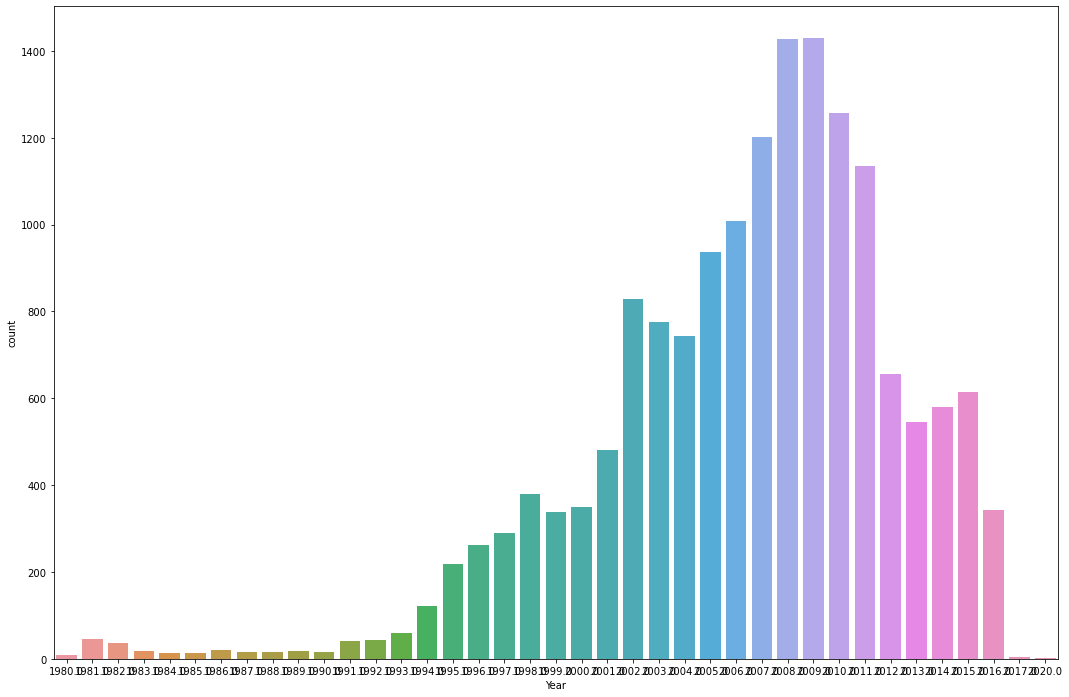

In [15]:
plt.figure(figsize=(18, 12)) # размер графика
sns.countplot(df.Year)

# # 5

На каких платформах произошло больше всего релизов?

Оставьте названия только тех платформ, частота встречаемости которых составляет более 7%. Значения укажите в порядке убывания частоты встречаемости через запятую с пробелом.

Пример: 

'Wii', 'NES', 'GB'

In [16]:
df.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [18]:
top_platform = df.Platform.value_counts(normalize=True).mul(100).to_frame('pct')
top_platform

,pct
DS,13.080842
PS2,13.056289
PS3,8.004420
Wii,7.918483
X360,7.574735
PSP,7.347615
PS,7.298508
PC,5.757780
XB,4.929102
GBA,4.824750


In [19]:
top_platform.query('pct > 7').index.to_list()

['DS', 'PS2', 'PS3', 'Wii', 'X360', 'PSP', 'PS']

# # 6
Игры каких издателей (Publisher) встречаются в датасете чаще всего?

В качестве ответа укажите наибольшую абсолютную частоту встречаемости.

In [70]:
stats.mode(df.Publisher)

ModeResult(mode=array(['Electronic Arts'], dtype=object), count=array([1339]))

In [73]:
top_publisher = df.Publisher.value_counts()
top_publisher.head(5)

Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
Name: Publisher, dtype: int64

# # 7

Сфокусируемся на играх от Nintendo. Посчитайте среднее, медиану и стандартное отклонение по продажам игр данного издателя в разных регионах (NA, EU, JP, Other). 

В каком регионе медианное значение объема продаж является наибольшим?

Hint: mean, median, std. Переменные: NA_sales и т.д. для нужных регионов.

In [ ]:
#1ый вариант

In [74]:
plt_nintendo = df.query("Publisher == 'Nintendo'")

In [76]:
plt_nintendo.NA_Sales.mean()

1.1720545977011496

In [77]:
plt_nintendo.NA_Sales.median()

0.375

In [78]:
plt_nintendo.NA_Sales.std()

2.98991281649686

In [ ]:
# 2ой вариант

In [79]:
plt_nintendo.NA_Sales.agg(['mean', 'median', 'std'])

mean      1.172055
median    0.375000
std       2.989913
Name: NA_Sales, dtype: float64

In [80]:
plt_nintendo.EU_Sales.agg(['mean', 'median', 'std'])

mean      0.601006
median    0.120000
std       1.743953
Name: EU_Sales, dtype: float64

In [81]:
plt_nintendo.JP_Sales.agg(['mean', 'median', 'std'])

mean      0.653721
median    0.280000
std       1.063110
Name: JP_Sales, dtype: float64

In [82]:
# 3ий вариант 
plt_nintendo.describe(include='all')

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,696.000000,696,696,696.00000,696,696,696.000000,696.000000,696.000000,696.000000,696.000000
unique,NaN,662,10,NaN,12,1,NaN,NaN,NaN,NaN,NaN
top,NaN,Mario Tennis,DS,NaN,Platform,Nintendo,NaN,NaN,NaN,NaN,NaN
freq,NaN,3,149,NaN,111,696,NaN,NaN,NaN,NaN,NaN
mean,3801.864943,NaN,NaN,2003.83046,NaN,NaN,1.172055,0.601006,0.653721,0.136767,2.563836
std,3969.268372,NaN,NaN,7.77637,NaN,NaN,2.989913,1.743953,1.063110,0.464170,5.676925
min,1.000000,NaN,NaN,1983.00000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.010000
25%,710.750000,NaN,NaN,2000.00000,NaN,NaN,0.010000,0.007500,0.090000,0.000000,0.300000
50%,2262.000000,NaN,NaN,2005.00000,NaN,NaN,0.375000,0.120000,0.280000,0.030000,0.920000
75%,5901.750000,NaN,NaN,2009.00000,NaN,NaN,0.972500,0.482500,0.740000,0.090000,2.262500


# # 8

Теперь посмотрим на продажи Nintendo в Японии по жанрам. Постройте боксплот, где:

по оси x будет расположен жанр игры (Genre)
по оси у – объем продаж в Японии (JP_sales)
Взглянем на получившиеся боксплоты. Что мы можем по ним сказать о данных?

Hint: sns.boxplot(). Для удобства можете изменить размер графика, например: plt.figure(figsize=(16,16))

In [85]:
plt_nintendo.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


<AxesSubplot:xlabel='Genre', ylabel='JP_Sales'>

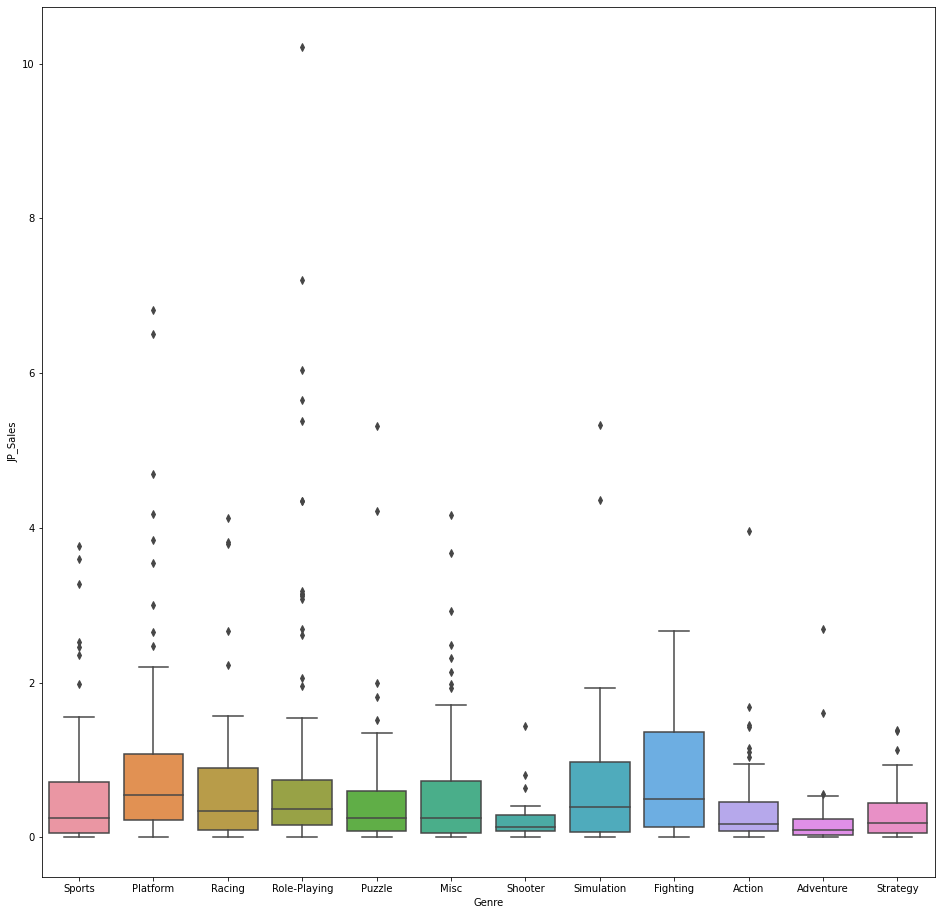

In [108]:
plt.figure(figsize=(16,16))
sns.boxplot(x='Genre', y='JP_Sales', data=plt_nintendo)

** Межквартильный размах у Strategy меньше, чем у Puzzle

Наибольший межквартильный размах наблюдается у игр жанра Role-Playing

** Наибольший межквартильный размах наблюдается у игр жанра Fighting

** Медианное значение продаж игр жанра Fighting выше, чем у игр Simulation

Среднее значение продаж игр жанра Fighting выше, чем у игр Simulation

# # 9

Визуализируйте динамику изменения объема мировых продаж (Global_Sales) по годам для игр Nintendo следующих жанров: Fighting, Simulation, Platform, Racing, Sports.

На каком отрезке времени игры жанра Sports были наиболее популярны? Иными словами, выберите наименьший отрезок, который включает в себя несколько крупных пиков. 

In [109]:
plt_nintendo.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [166]:
XXX = plt_nintendo.query("Genre in ('Fighting', 'Simulation', 'Platform', 'Racing', 'Sports')")\
            .groupby(['Genre', 'Year'])\
            .sum()            #.agg({'Global_Sales': sum})
        

In [167]:
XXX.reset_index()

,Genre,Year,Rank,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Fighting,1987.0,1114,2.80,0.65,1.87,0.10,5.42
1,Fighting,1993.0,851,0.52,0.16,1.29,0.03,2.00
2,Fighting,1995.0,423,2.26,0.72,0.12,0.10,3.20
3,Fighting,1996.0,10944,0.61,0.19,0.17,0.01,0.99
4,Fighting,1999.0,158,2.95,0.60,1.97,0.04,5.55
...,...,...,...,...,...,...,...,...
109,Sports,2010.0,12908,0.90,0.51,0.63,0.14,2.18
110,Sports,2012.0,12243,0.26,0.29,0.44,0.05,1.05
111,Sports,2013.0,4942,0.78,0.46,0.34,0.12,1.69
112,Sports,2014.0,8947,0.34,0.28,0.21,0.06,0.88


<AxesSubplot:xlabel='Year', ylabel='Global_Sales'>

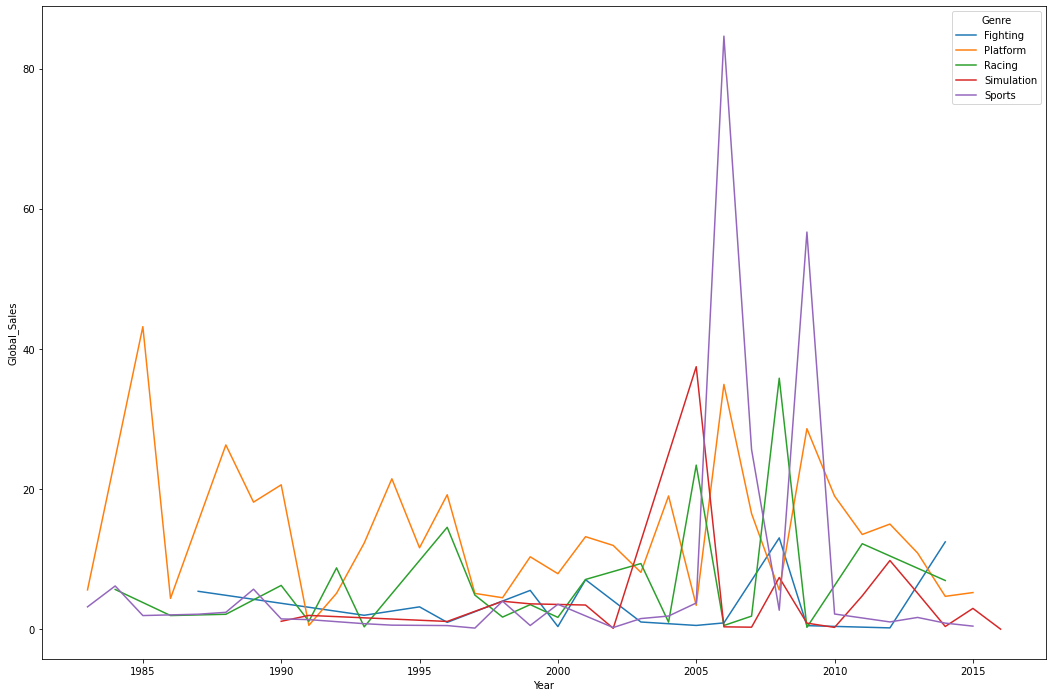

In [168]:
plt.figure(figsize=(18,12))
sns.lineplot(x = 'Year', y = 'Global_Sales', hue = 'Genre', data = XXX)